# 1. K-Means 클러스터링
#### 데이터의 종속 변수 값 예측이 아닌 독립변수의 특성만으로 데이터의 그룹, 클러스터(cluster)를 형성하는 작업

### K-Means
#### 가장 단순하고 빠른 클러스터링 알고리즘의 하나.
#### 목적함수 값이 최소화될 때까지 클러스터의 수  KK 와 각 클러스터의 중심(centroid) ${\\mu_k}$ 를 반복해서 찾는 것\
#### ${J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)}$
#### ${d}$는 두 데이터의 유사도 함수(Similarity Function) 혹은 거리(Distance)로 다음과 같이 정의한다.
#### ${d(x_i, \mu_k) = || x_i - \mu_k ||^2}$

> 세부 알고리즘
1. 임의의 중심값  μkμk  를 고른다. (보통 데이터 샘플 중의 하나를 선택)
2. 중심에서 각 샘플 데이터까지의 거리를 계산
3. 각 데이터 샘플에서 가장 가까운 중심을 선택하여 클러스터 갱신
4. 다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1 ~ 4를 반복한다.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
from sklearn.cluster import KMeans

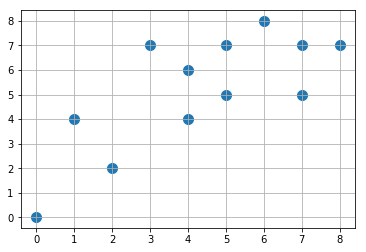

In [5]:
X = np.array([[7, 5],[5, 7],[7, 7],[4, 4],[4, 6],[1, 4],[0, 0],[2, 2],[8, 7],[6, 8],[5, 5],[3, 7]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.grid(True)

In [7]:
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)

[ 6.6  6.8] [ 2.71428571  4.        ]


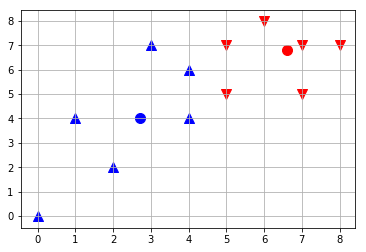

In [9]:
c0, c1 = model.cluster_centers_
print(c0, c1)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.grid(True)

In [10]:
def kmeans_df(c0, c1):
    df = pd.DataFrame(np.hstack([X, 
                                np.linalg.norm(X - c0, axis=1)[:, np.newaxis], 
                                np.linalg.norm(X - c1, axis=1)[:, np.newaxis], 
                                model.labels_[:, np.newaxis]]),
                    columns=["x0", "x1", "d0", "d1", "c"])
    return df

kmeans_df(c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [11]:
print(X[model.labels_==0,0].mean(), X[model.labels_==0,1].mean())
print(X[model.labels_==1,0].mean(), X[model.labels_==1,1].mean())

6.33333333333 6.5
2.33333333333 3.83333333333


In [12]:
model.score(X)

-63.004081632653012

[ 1.  2.] [ 5.44444444  6.22222222]


,x0,x1,d0,d1,c
0,7.0,5.0,6.708204,1.978277,1.0
1,5.0,7.0,6.403124,0.895806,1.0
2,7.0,7.0,7.810250,1.739164,1.0
3,4.0,4.0,3.605551,2.650413,1.0
4,4.0,6.0,5.000000,1.461438,1.0
5,1.0,4.0,2.000000,4.969040,0.0
6,0.0,0.0,2.236068,8.267891,0.0
7,2.0,2.0,1.000000,5.448978,0.0
8,8.0,7.0,8.602325,2.671292,1.0
9,6.0,8.0,7.810250,1.862562,1.0


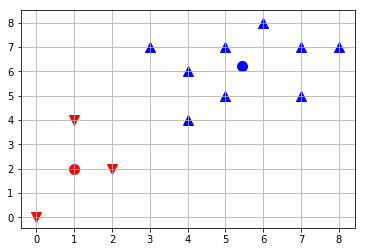

In [15]:
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=2, random_state=0).fit(X)
c0, c1 = model.cluster_centers_
print(c0, c1)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
kmeans_df(c0, c1)
plt.grid(True)

In [16]:
model.score(X)

-45.777777777777729

In [17]:
(np.linalg.norm(X[model.labels_==0] - c0, axis=1)**2).sum() + \
(np.linalg.norm(X[model.labels_==1] - c1, axis=1)**2).sum()

45.777777777777779

[ 1.  2.] [ 5.44444444  6.22222222]


,x0,x1,d0,d1,c
0,7.0,5.0,6.708204,1.978277,1.0
1,5.0,7.0,6.403124,0.895806,1.0
2,7.0,7.0,7.810250,1.739164,1.0
3,4.0,4.0,3.605551,2.650413,1.0
4,4.0,6.0,5.000000,1.461438,1.0
5,1.0,4.0,2.000000,4.969040,0.0
6,0.0,0.0,2.236068,8.267891,0.0
7,2.0,2.0,1.000000,5.448978,0.0
8,8.0,7.0,8.602325,2.671292,1.0
9,6.0,8.0,7.810250,1.862562,1.0


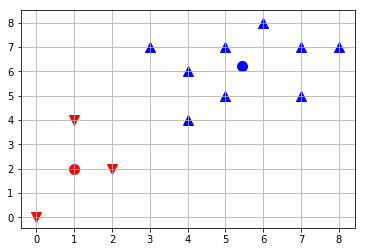

In [19]:
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=100, random_state=0).fit(X)
c0, c1 = model.cluster_centers_
print(c0, c1)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
kmeans_df(c0, c1)
plt.grid(True)

### K-Means++
#### 최초의 중심값을 설정하기 위한 알고리즘

> 1. 중심값을 저장할 집합 ${M}$ 준비
2. 일단 하나의 중심 ${\mu_0}$를 랜덤하게 선택하여 ${M}$ 에 넣는다.
3. ${M}$에 속하지 않는 모든 샘플 ${x_i}$에 대해 거리 ${d(M, x_i)}$를 계산. ${d(M, x_i)}$는 ${M}$안의 모든 샘플 ${\mu_k}$에 대해 ${d(\mu_k, x_i)}$를 계산하여 가장 작은 값 선택
4. ${d(M, x_i)}$에 비례한 확률로 다음 중심 ${\mu}$를 선택
5. ${K}$개의 중심을 선택할 때까지 반복
6. K-Means 알고리즘 사용

### 예: Iris

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib as mpl

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[]

[]

[]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[]

[]

[]

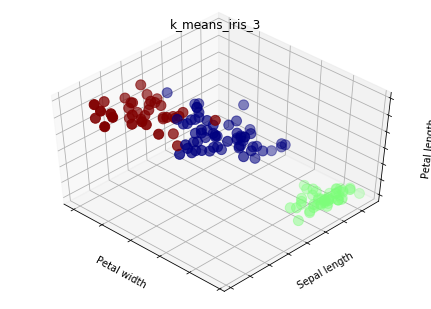

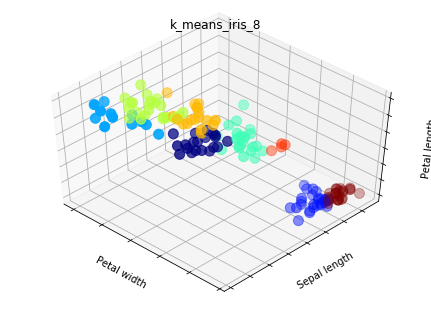

In [24]:
np.random.seed(5)
centers = [[1,1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
x = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8)}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    est.fit(x)
    labels = est.labels_
    ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=labels.astype(np.float), s=100, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title(name)
    fignum = fignum + 1

### 예: Digit Image

In [25]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

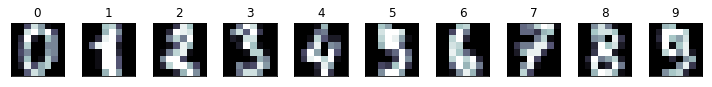

In [26]:
digits = load_digits()
data = scale(digits.data)

def print_digits(images, labels):
    f = plt.figure(figsize=(10,2))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.table
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
print_digits(digits.images, range(10))

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, images_train, images_test = \
    train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

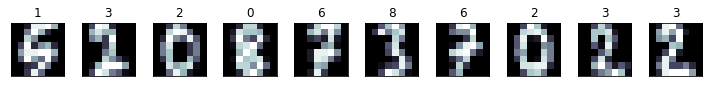

In [34]:
from sklearn.cluster import KMeans
clf = KMeans(init="k-means++", n_clusters=10, random_state=42)
clf.fit(x_train)
print_digits(images_train, clf.labels_)

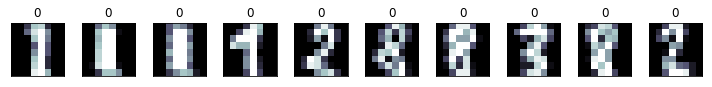

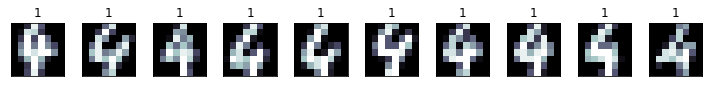

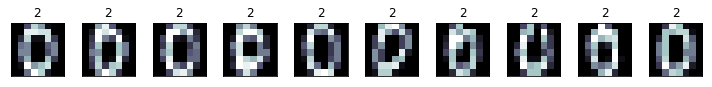

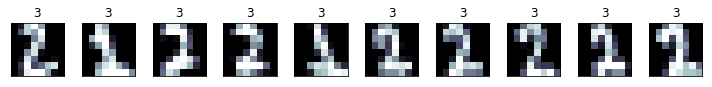

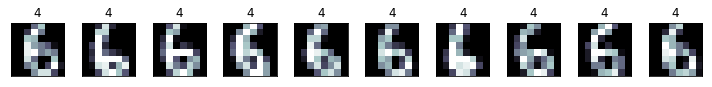

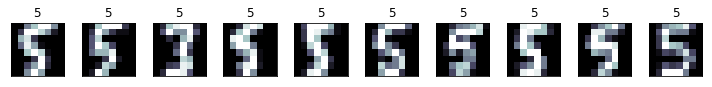

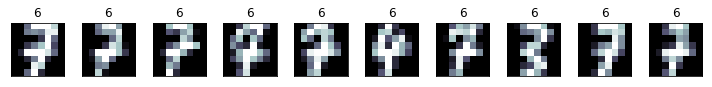

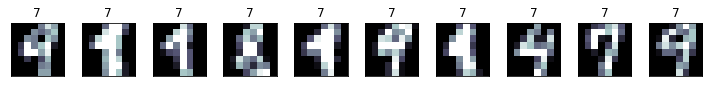

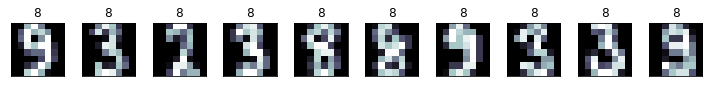

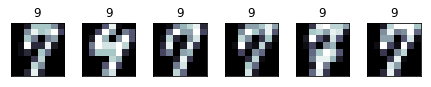

In [35]:
y_pred = clf.predict(x_test)
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    print_digits(images, y_pred)
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  7,  0,  0,  0, 10,  0,  0],
       [ 5,  0,  0, 31,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  1,  4,  0, 39,  0],
       [ 1, 50,  0,  0,  0,  0,  1,  2,  0,  1],
       [ 1,  0,  0,  0,  1, 41,  0,  0, 16,  0],
       [ 0,  0,  1,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  1,  0,  5],
       [21,  0,  0,  0,  0,  3,  1,  2, 11,  0],
       [ 0,  0,  0,  0,  0,  2,  3,  3, 40,  0]])

### 클러스터링 성능 기준
> 정확한 답(클러스터의 갯수 및 소속)을 알고 있는 경우
>> 
 - Adusted Rand index
 - Adjusted Mutual Information
 - Homogeneity, completeness and V-measure
 - Fowlkes-Mallows scores

> 정확한 답(클러스터의 갯수 및 소속)을 모르는 경우
>>
 - Silhouette Coefficient
 - Calinski-Harabaz index

### 예: Silhouette Coefficient
#### ${s = \dfrac{b - a}{\max{(a, b)}}}$
####  - ${a}$ : 같은 클러스터 속한 원소들의 평균 거리
####  - ${b}$ : 다른 클러스터 중 가장 가까운 클러스터까지의 평균 거리

####  - http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm